<a href="https://colab.research.google.com/github/maviayten/karar_a-a-lar-_uygulamalar-/blob/main/Random_Forest_Uygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Iris veri setinin yüklenmesi
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# Veri setinin ilk birkaç satırını göster
print(iris_data.head())

# Veri setinin genel yapısını inceleme
# Veri setinin boyutlarını yazdır
print("\nVeri setinin boyutları:", iris_data.shape)

# Her sütunda eksik değer sayısını kontrol et
print("\nSütunlardaki eksik değer sayıları:")
missing_values = iris_data.isnull().sum()
print(missing_values)

# Her sütunun veri tipini kontrol et
print("\nSütunların veri tipleri:")
print(iris_data.dtypes)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Veri setinin boyutları: (150, 5)

Sütunlardaki eksik değer sayıları:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Sütunların veri tipleri:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


In [2]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temel İstatistiklerin İncelenmesi
# Veri setinin temel istatistiklerini göster
print("Temel İstatistikler:\n", iris_data.describe())




Temel İstatistikler:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


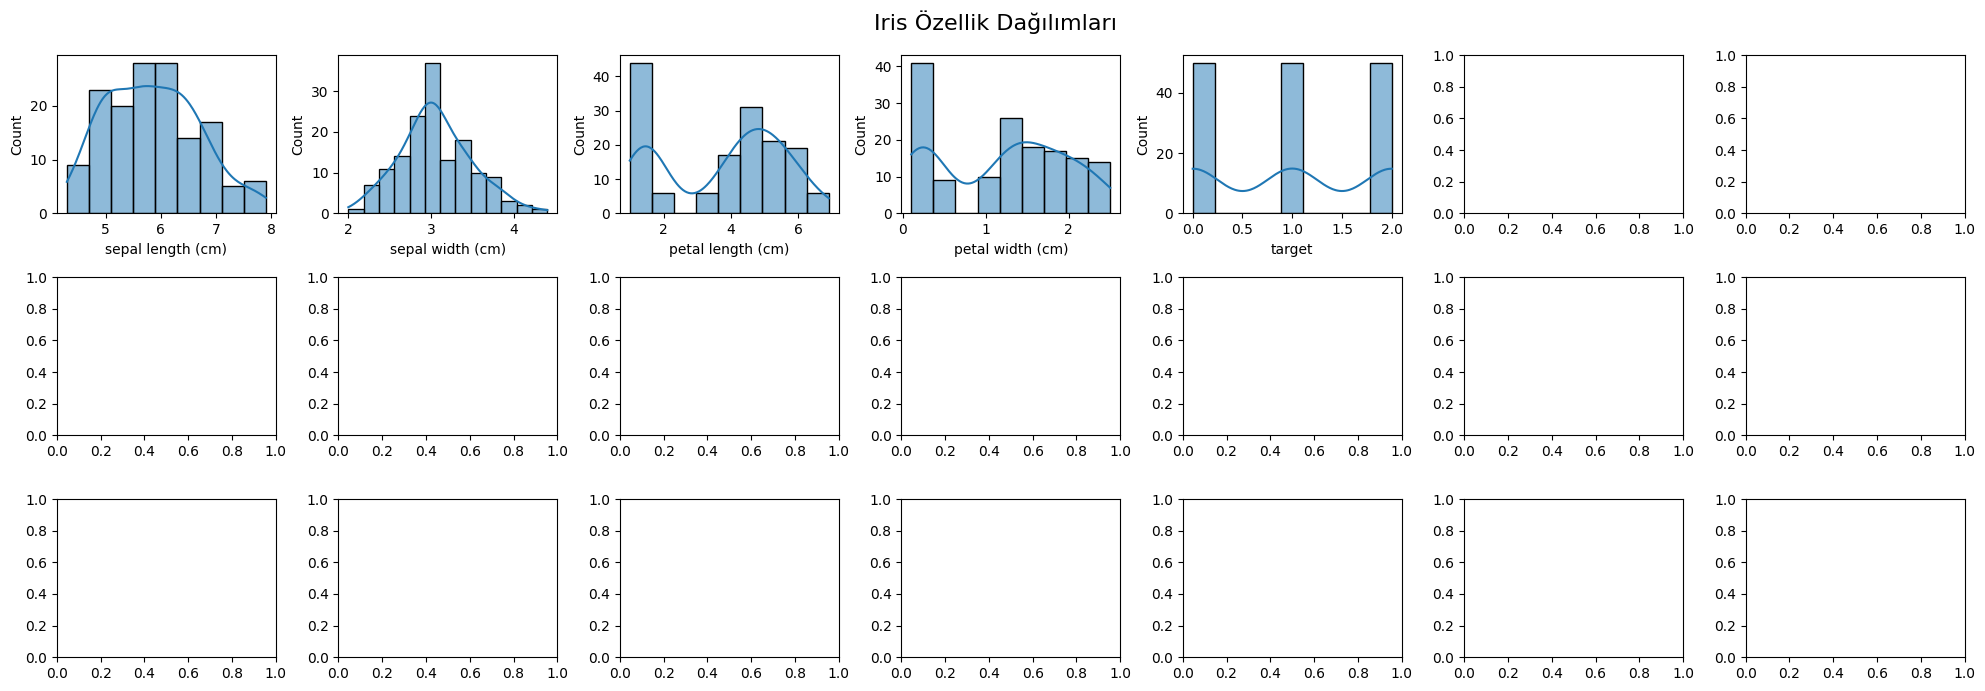

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Iris veri setini yükleme
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# 3x7'lik subplot ızgarası oluştur
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20, 7))
fig.suptitle("Iris Özellik Dağılımları", fontsize=16)

# Her subplot için bir özellik çiz
for i, column in enumerate(iris_data.columns):
    row = i // 7
    col = i % 7
    sns.histplot(iris_data[column], kde=True, ax=axes[row, col])

plt.tight_layout()  # Üst başlıkla subplotlar arasında boşluk ayarla
plt.show()


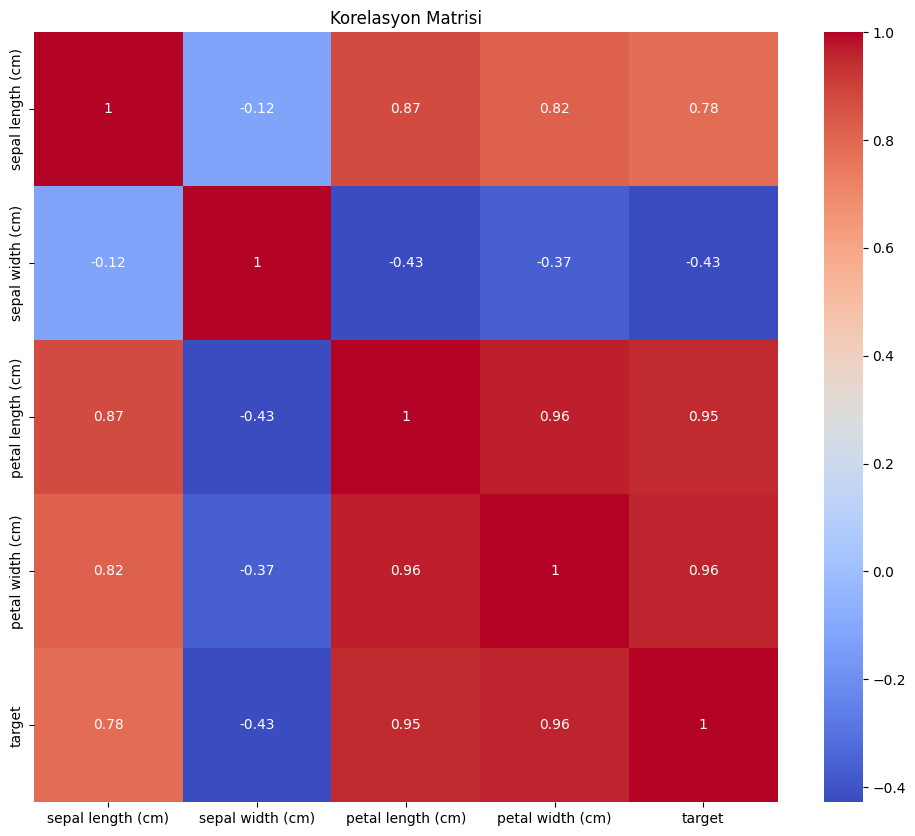

In [12]:
# Korelasyon Analizi
# Özellikler arasındaki korelasyon matrisini hesapla ve ısı haritası ile göster
correlation_matrix = iris_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Veri setini bağımsız ve bağımlı değişkenlere ayırma
X = iris_data.drop('target', axis=1)  # target sütununu bağımlı değişken olarak ayırıyoruz
y = iris_data['target']  # target sütununu bağımlı değişken olarak alıyoruz

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestClassifier modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma ve performans değerlendirme
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
from sklearn.feature_selection import SelectFromModel

# Özellik önem derecelerini belirleme
feature_importances = rf_model.feature_importances_

# Önemli özellikleri seç
selector = SelectFromModel(rf_model, threshold='median')
selector.fit(X_train, y_train)

# Seçilen özelliklerle yeni veri setlerini oluşturma
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Seçilen özelliklerle RandomForest modelini yeniden eğitme
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Yeniden eğitilmiş modelin performansını değerlendirme
y_pred_selected = rf_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print(accuracy_selected),
print(report_selected)



1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [16]:
from sklearn.model_selection import GridSearchCV

# Hiperparametrelerin tanımlanması
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV ile model oluşturma
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# GridSearchCV ile hiperparametre optimizasyonunu çalıştırma
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve bu parametrelerle elde edilen en iyi skoru göster
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)



Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9523809523809524


In [17]:
# En iyi parametrelerle RandomForestClassifier modelini oluşturma
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Modeli eğitme
best_rf_model.fit(X_train, y_train)

# Tahminleri yapma
y_pred = best_rf_model.predict(X_test)

# Sınıflandırma raporu oluşturma

best_accuracy_selected = accuracy_score(y_test, y_pred)
best_classification_rep = classification_report(y_test, y_pred)

print(best_accuracy_selected)
print(best_classification_rep)


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



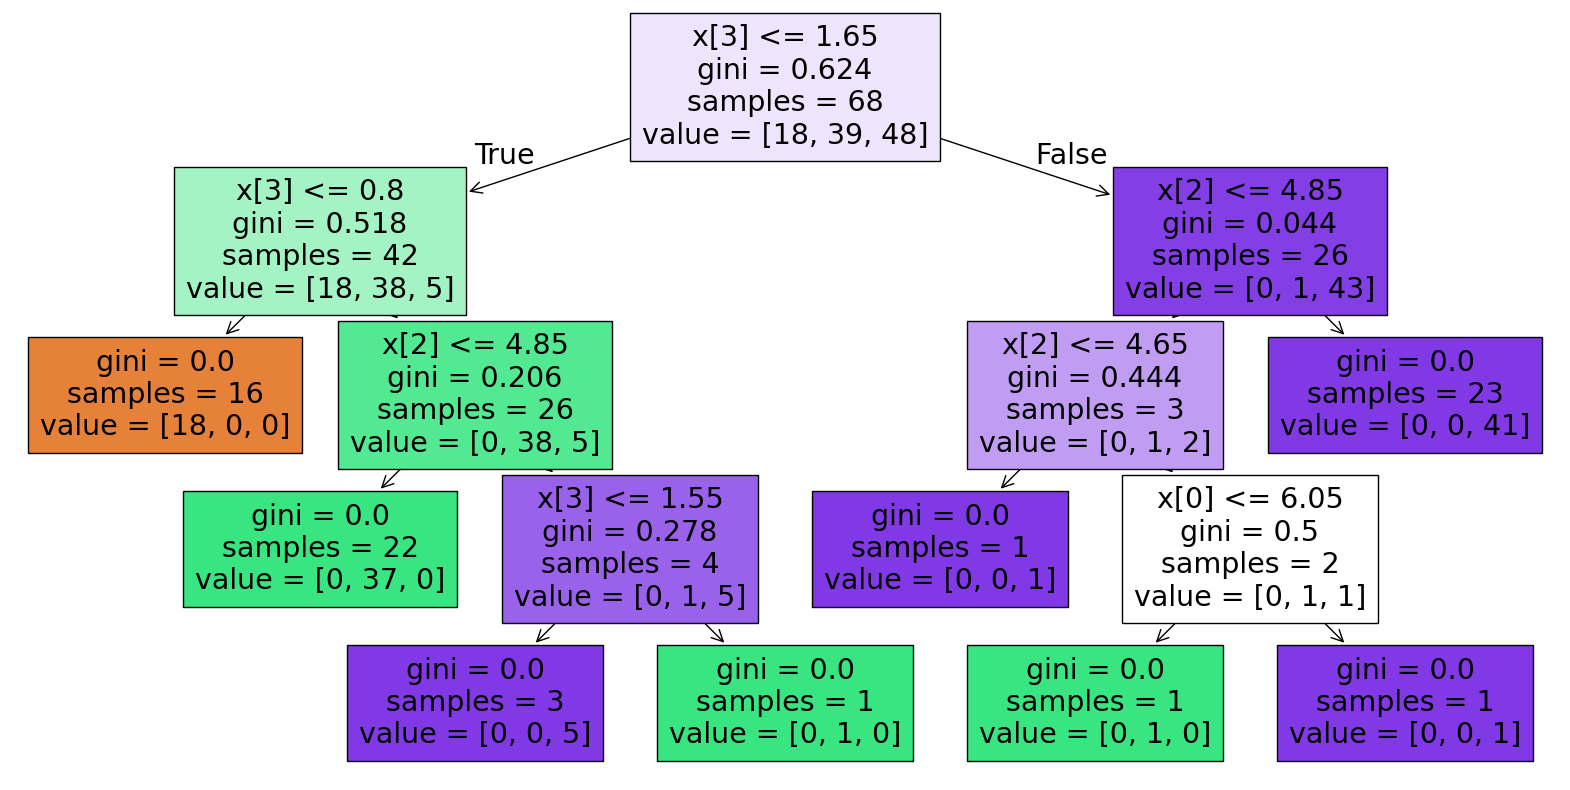

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Bir ağacın görselleştirilmesi
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], filled=True)
plt.show()


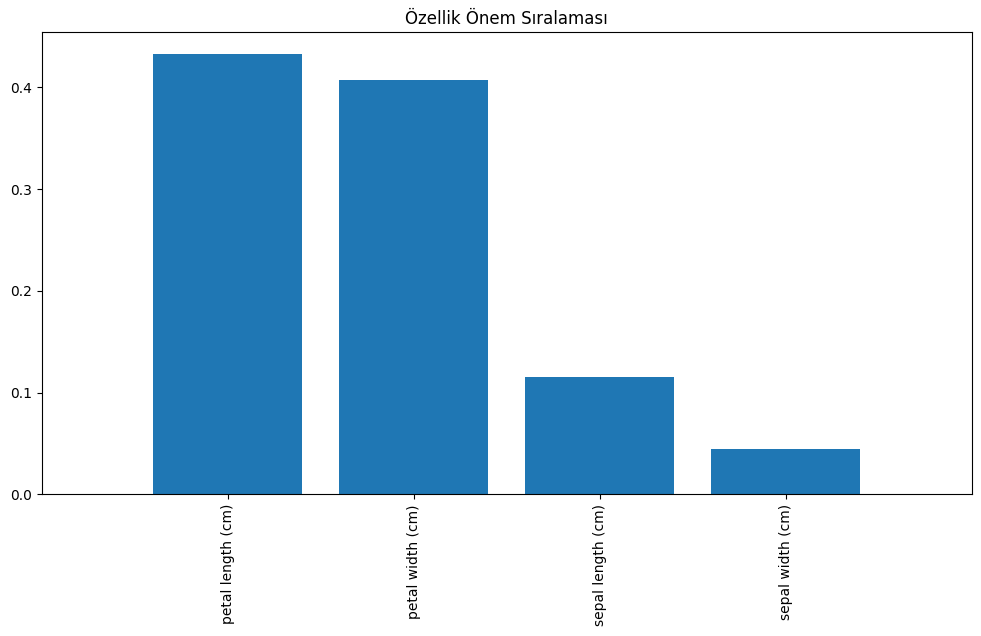

In [19]:
# Özellik önemi görselleştirilmesi
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Özellik Önem Sıralaması")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
